# chi-square test **of independence**

- 두 그룹(변수)의 유사성 테스트

'기존' 분석의 interface를 최대한 유지 -> pandas dataframe 활용 


https://towardsdatascience.com/chi-square-test-for-independence-in-python-with-examples-from-the-ibm-hr-analytics-dataset-97b9ec9bb80a

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [81]:
data = pd.read_csv("./stat/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [82]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### 두 변수의 상관관계 '눈으로' 확인 -- crosstab

In [86]:
ct = pd.crosstab(data.Attrition, data.JobSatisfaction, margins=True)
ct

JobSatisfaction,1,2,3,4,All
Attrition,,,,,
No,223,234,369,407,1233
Yes,66,46,73,52,237
All,289,280,442,459,1470


두 변수는 상관관계가 있는가?  
숫자로 알아보자. 

In [87]:
row_sum = ct.iloc[0:2,4].values

In [88]:
row_sum

array([1233,  237], dtype=int64)

Categorical data는 ingeter로 encoding된 상태로 가정 

In [90]:
ct.iloc[2,0:4].values

array([289, 280, 442, 459], dtype=int64)

In [69]:
def plot_annot_hist2d(x,y, bins=None):
    fig, ax = plt.subplots()
    
    hist, xbins, ybins, im = ax.hist2d(x,y, bins=bins)

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax.text(xbins[j]+0.5,ybins[i]+0.5, int(hist.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold")
    plt.show()

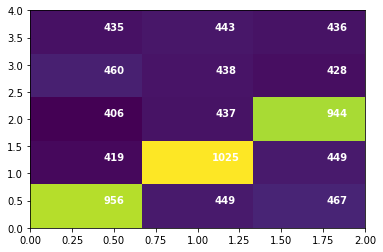

In [74]:
N = 8192

n_cat1 = 3
n_cat2 = 5

degree_of_freedom = (n_cat1-1)*(n_cat2-1)

V1 = np.random.randint(0, n_cat1, size=N)
V2 = np.random.randint(0, n_cat2, size=N)

# bit of corr
V2[::5] = V1[::5]

plot_annot_hist2d(V1,V2, bins=[n_cat1, n_cat2])

## Q: are V1 and V2 independent? 
### Step 1: count number of the occurence of each category

In [75]:
np.bincount(V1)

array([2676, 2792, 2724], dtype=int64)

In [76]:
np.bincount(V2)

array([1872, 1893, 1787, 1326, 1314], dtype=int64)

In [ ]:
Ev1 = 

In [35]:
chi2 = np.sum((obs-E)**2/E)

In [36]:
chi2

20728.00277777778

In [32]:
stats.chisquare(obs, E)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.19411032766486935